In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
qfx = pd.read_csv(r'/Users/daviddangol/Documents/monthly report/Qfx/data/movies_analysis _qfx_integration_raw.csv')

In [3]:
display(qfx.head())
display(qfx.info())

,product_code,product_name,txn_date,txn_nep_month,txn_nep_date,account_id,amount,channel,theater,user_type,last_txn_before_bhadra,first_active_after_bhadra,active_difference,churn_or_not
0,NP-ES-ELEMENTS,Elements Movies (QFX),06-10-2025,Ashoj,20,29,440.0,WEB,Elements Movies (QFX),Old User,20-07-2025,06-10-2025,78.0,3 Months Churn
1,FCUBECINEMAS,FCube Cinemas,02-10-2025,Ashoj,16,47,2880.0,WEB,FCube Cinemas,Old User,12-08-2025,19-08-2025,7.0,Not Churn
2,QFX_civil,QFX Civil,20-09-2025,Ashoj,4,343,1406.0,WEB,QFX Civil,Old User,10-08-2025,24-08-2025,14.0,Not Churn
3,NP-ES-CDC,Cine De Chef,24-09-2025,Ashoj,8,354,1050.0,WEB,Cine De Chef,Old User,02-08-2025,21-08-2025,19.0,Not Churn
4,ES-1912120466,Regal Cinemas (Biratnagar),30-08-2025,Bhadra,14,415,400.0,WEB,Regal Cinemas (Biratnagar),Deleted User,29-07-2025,30-08-2025,32.0,1 Months Churn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135574 entries, 0 to 135573
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   product_code               135574 non-null  object 
 1   product_name               135574 non-null  object 
 2   txn_date                   135574 non-null  object 
 3   txn_nep_month              135574 non-null  object 
 4   txn_nep_date               135574 non-null  int64  
 5   account_id                 135574 non-null  int64  
 6   amount                     135574 non-null  float64
 7   channel                    135574 non-null  object 
 8   theater                    135574 non-null  object 
 9   user_type                  135574 non-null  object 
 10  last_txn_before_bhadra     134290 non-null  object 
 11  first_active_after_bhadra  135574 non-null  object 
 12  active_difference          134895 non-null  float64
 13  churn_or_not               13

None

In [4]:
qfx.columns

Index(['product_code', 'product_name', 'txn_date', 'txn_nep_month',
       'txn_nep_date', 'account_id', 'amount', 'channel', 'theater',
       'user_type', 'last_txn_before_bhadra', 'first_active_after_bhadra',
       'active_difference', 'churn_or_not'],
      dtype='object')

In [14]:
min_date = qfx_clients_df['txn_date'].min()
max_date = qfx_clients_df['txn_date'].max()

print(f"Minimum Transaction Date (QFX Clients): {min_date}")
print(f"Maximum Transaction Date (QFX Clients): {max_date}")

Minimum Transaction Date (QFX Clients): 2025-08-17 00:00:00
Maximum Transaction Date (QFX Clients): 2025-10-14 00:00:00


In [5]:

print("\nValue Counts and Percentages for 'churn_or_not':")
churn_counts = qfx['churn_or_not'].value_counts()
churn_percentages = qfx['churn_or_not'].value_counts(normalize=True) * 100
churn_df = pd.DataFrame({'Count': churn_counts, 'Percentage (%)': churn_percentages})
display(churn_df.round(2))


Value Counts and Percentages for 'churn_or_not':


,Count,Percentage (%)
churn_or_not,,
Not Churn,117478,87.09
1 Months Churn,6177,4.58
2 Months Churn,5508,4.08
3 Months Churn,1944,1.44
4 Months Churn,906,0.67
...,...,...
70 Months Churn,1,0.00
75 Months Churn,1,0.00
72 Months Churn,1,0.00


In [6]:
# Filter for rows where 'product_code' contains 'QFX' (case-insensitive)
qfx_clients_df = qfx[qfx['product_code'].str.contains('QFX', case=False, na=False)].copy()

print("Value Counts and Percentages for 'product_name' (QFX clients only):")
product_name_counts_qfx = qfx_clients_df['product_name'].value_counts()
product_name_percentages_qfx = qfx_clients_df['product_name'].value_counts(normalize=True) * 100
product_name_df_qfx = pd.DataFrame({'Count': product_name_counts_qfx, 'Percentage (%)': product_name_percentages_qfx.round(4)})
display(product_name_df_qfx.round(2))

Value Counts and Percentages for 'product_name' (QFX clients only):


,Count,Percentage (%)
product_name,,
QFX Labim,9397,25.13
QFX Civil,8611,23.03
QFX Jalma Bharatpur,4444,11.89
QFX Chhaya Centre,3937,10.53
QFX Cinemas One Stop Mall,3388,9.06
QFX Bageshwori Nepalgunj,2575,6.89
Skyline moives (QFX Birgunj ),2418,6.47
QFX Durbar Cinemax,1268,3.39
QFX Cinemas,794,2.12


In [7]:
print("\nValue Counts and Percentages for 'channel' (QFX clients only):")
channel_counts_qfx = qfx_clients_df['channel'].value_counts()
channel_percentages_qfx = qfx_clients_df['channel'].value_counts(normalize=True) * 100
channel_df_qfx = pd.DataFrame({'Count': channel_counts_qfx, 'Percentage (%)': channel_percentages_qfx.round(4)})
display(channel_df_qfx.round(2))


Value Counts and Percentages for 'channel' (QFX clients only):


,Count,Percentage (%)
channel,,
WEB,36231,96.9
GPRS,1158,3.1


In [8]:
print("\nValue Counts and Percentages for 'churn_or_not' (QFX clients only):")
churn_counts_qfx = qfx_clients_df['churn_or_not'].value_counts()
churn_percentages_qfx = qfx_clients_df['churn_or_not'].value_counts(normalize=True) * 100
churn_df_qfx = pd.DataFrame({'Count': churn_counts_qfx, 'Percentage (%)': churn_percentages_qfx.round(4)})
display(churn_df_qfx.round(2))


Value Counts and Percentages for 'churn_or_not' (QFX clients only):


,Count,Percentage (%)
churn_or_not,,
Not Churn,32512,87.38
1 Months Churn,1708,4.59
2 Months Churn,1470,3.95
3 Months Churn,499,1.34
4 Months Churn,244,0.66
5 Months Churn,161,0.43
6 Months Churn,113,0.30
7 Months Churn,68,0.18
9 Months Churn,53,0.14


In [9]:
qfx_clients_df['txn_date'] = pd.to_datetime(qfx_clients_df['txn_date'], format='%d-%m-%Y')
qfx_clients_df['day_of_week'] = qfx_clients_df['txn_date'].dt.day_name()

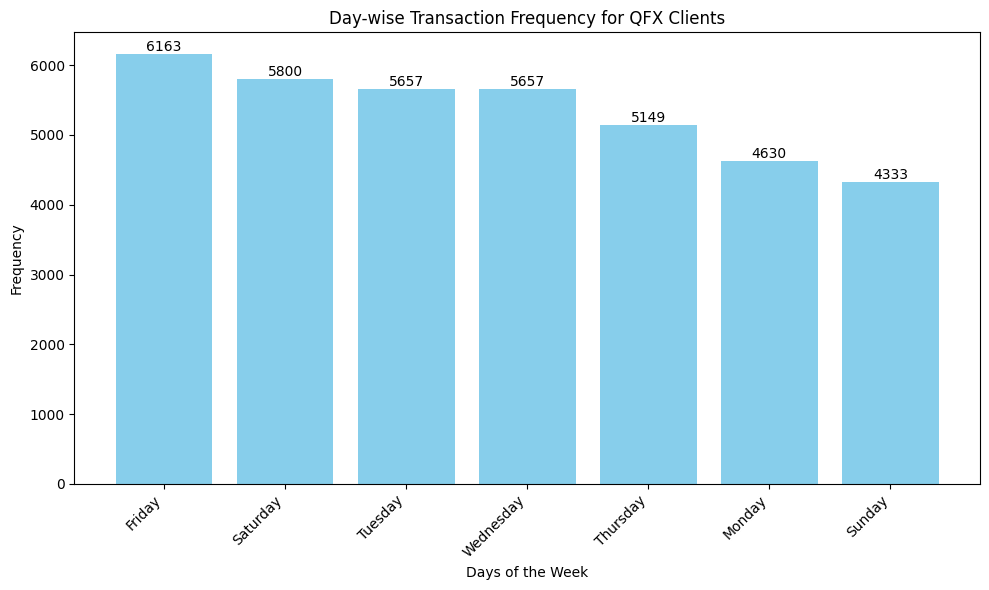

In [10]:
day_counts = qfx_clients_df['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(day_counts.index, day_counts.values, color='skyblue')

plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.title('Day-wise Transaction Frequency for QFX Clients')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center') # Add bar headers

plt.tight_layout()
plt.show()

In [11]:
# Total amount spent
total_amount_spent_qfx = qfx_clients_df['amount'].sum()
print(f"Total amount spent by QFX clients: {total_amount_spent_qfx:.2f}")

Total amount spent by QFX clients: 43196861.00


In [12]:

# Average spend on each date with respect to channel
average_spend_by_date_channel = qfx_clients_df.groupby(['txn_date', 'channel'])['amount'].mean().reset_index()
print("\nAverage spend by date and channel for QFX clients:")
display(average_spend_by_date_channel.head().round(2))



Average spend by date and channel for QFX clients:


,txn_date,channel,amount
0,2025-08-17,WEB,1253.39
1,2025-08-18,WEB,1077.33
2,2025-08-19,WEB,945.46
3,2025-08-20,WEB,772.87
4,2025-08-21,WEB,972.11


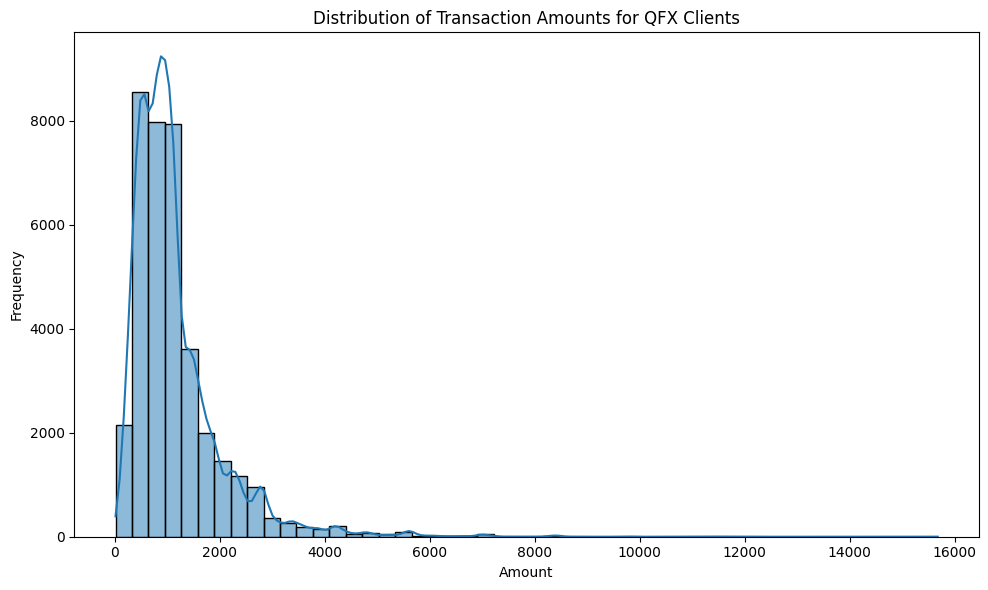

In [13]:
# Price breakdown with histogram
plt.figure(figsize=(10, 6))
sns.histplot(qfx_clients_df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts for QFX Clients')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [19]:
# Average amount spent according to day of week
average_spend_by_day = qfx_clients_df.groupby('day_of_week')['amount'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]) # Reindex to ensure consistent order of days
print("\nAverage amount spent by day of the week for QFX clients:")
display(average_spend_by_day.round(2))


Average amount spent by day of the week for QFX clients:


day_of_week
Monday       1109.37
Tuesday      1056.01
Wednesday    1032.55
Thursday     1118.14
Friday       1226.22
Saturday     1299.64
Sunday       1244.65
Name: amount, dtype: float64

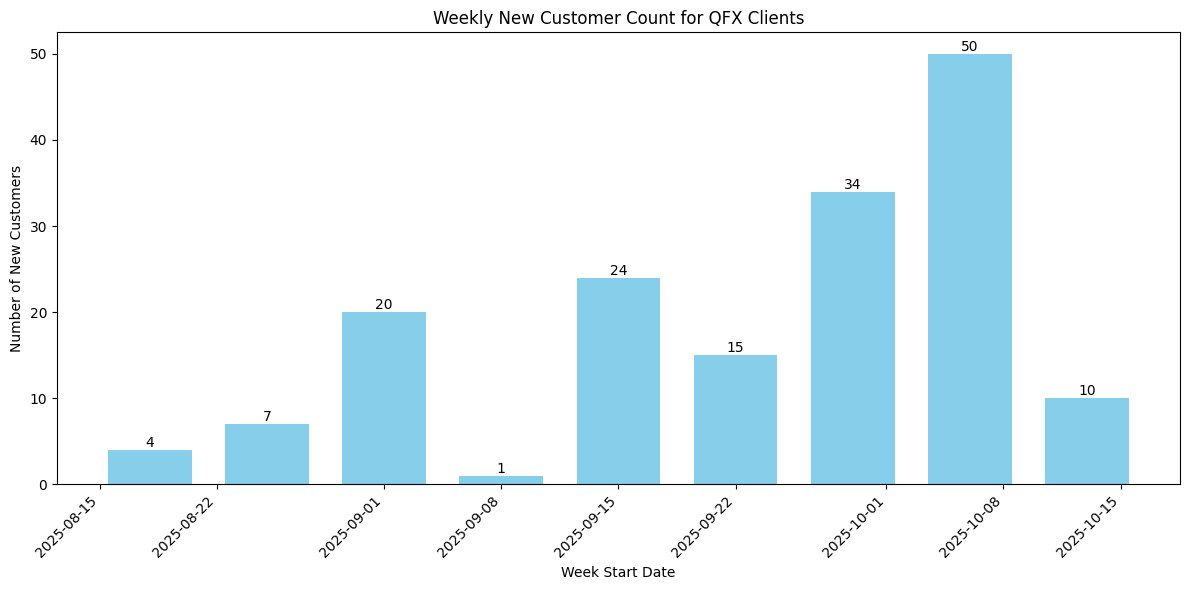

In [21]:
# Filter for new users in QFX clients
new_qfx_clients_df = qfx_clients_df[qfx_clients_df['user_type'] == 'New User'].copy()

# Extract the start of the week from transaction date
new_qfx_clients_df['week_start_date'] = new_qfx_clients_df['txn_date'].dt.to_period('W').dt.start_time

# Count new users per week
weekly_new_customer_counts = new_qfx_clients_df.groupby('week_start_date').size().reset_index(name='new_customer_count')

# Create bar chart with bigger bars
plt.figure(figsize=(12, 6))
bars = plt.bar(weekly_new_customer_counts['week_start_date'], weekly_new_customer_counts['new_customer_count'], color='skyblue', width=5) # Increased width

plt.title('Weekly New Customer Count for QFX Clients')
plt.xlabel('Week Start Date')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45, ha='right')

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()



In [22]:
# Analyze users with high frequency of return after a long period

# Filter for users who were not marked as 'Not Churn' and have a recorded active_difference
returned_clients_df = qfx_clients_df[(qfx_clients_df['churn_or_not'] != 'Not Churn') & (qfx_clients_df['active_difference'].notna())].copy()

# Define a threshold for a "long period" (e.g., greater than the average active difference for churned users)
average_active_difference_churned = returned_clients_df['active_difference'].mean()
long_period_threshold = average_active_difference_churned # You can adjust this threshold as needed

# Filter for users who returned after a long period
returned_after_long_period_df = returned_clients_df[returned_clients_df['active_difference'] > long_period_threshold].copy()

# Analyze the frequency of return for these users (e.g., count transactions after the first return)
# To do this accurately, we would need more context on subsequent transactions for these users after their 'first_active_after_bhadra'

print(f"Number of clients who returned after a long period (active difference > {long_period_threshold:.2f} days): {len(returned_after_long_period_df)}")

# Display some characteristics of these users
print("\nCharacteristics of clients who returned after a long period:")
display(returned_after_long_period_df['user_type'].value_counts())
display(returned_after_long_period_df['churn_or_not'].value_counts().head())
display(returned_after_long_period_df['channel'].value_counts())

Number of clients who returned after a long period (active difference > 107.25 days): 983

Characteristics of clients who returned after a long period:


user_type
Old User        960
Deleted User     23
Name: count, dtype: int64

churn_or_not
4 Months Churn    208
5 Months Churn    161
6 Months Churn    113
7 Months Churn     68
9 Months Churn     53
Name: count, dtype: int64

channel
WEB     922
GPRS     61
Name: count, dtype: int64